## Mobility Score
Combining Foot traffic and Subway score with a 65 / 35 weighting to get a combined Mobility score per census tract

In [3]:
import pandas as pd

# Load the CSVs
foot_traffic_df = pd.read_csv("foot_traffic_scores_by_tract.csv")
subway_score_df = pd.read_csv("subway_score_by_tract.csv")

# Merge on GEOID
combined_df = pd.merge(foot_traffic_df, subway_score_df, on="GEOID", how="inner")

# Compute combined score (65% foot traffic, 35% subway access)
combined_df["combined_score"] = (
    0.65 * combined_df["foot_traffic_score"] +
    0.35 * combined_df["subway_score"]
).round(2)

# Reorder columns
combined_df = combined_df[["GEOID", "combined_score", "foot_traffic_score", "subway_score"]]

# Save to CSV
combined_df.to_csv("combined_scores.csv", index=False)


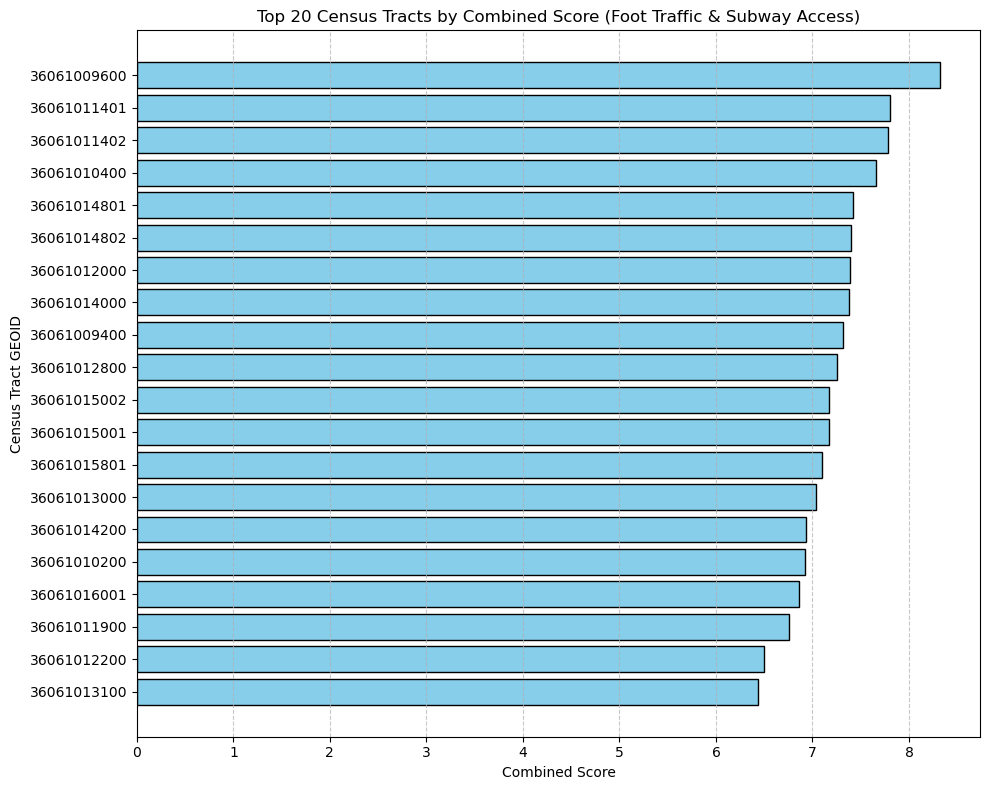

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined scores
combined_df = pd.read_csv("combined_scores.csv")

# Sort by combined score
top_tracts = combined_df.sort_values(by="combined_score", ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(
    top_tracts["GEOID"].astype(str),
    top_tracts["combined_score"],
    color="skyblue",
    edgecolor="black"
)

plt.xlabel("Combined Score")
plt.ylabel("Census Tract GEOID")
plt.title("Top 20 Census Tracts by Combined Score (Foot Traffic & Subway Access)")
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

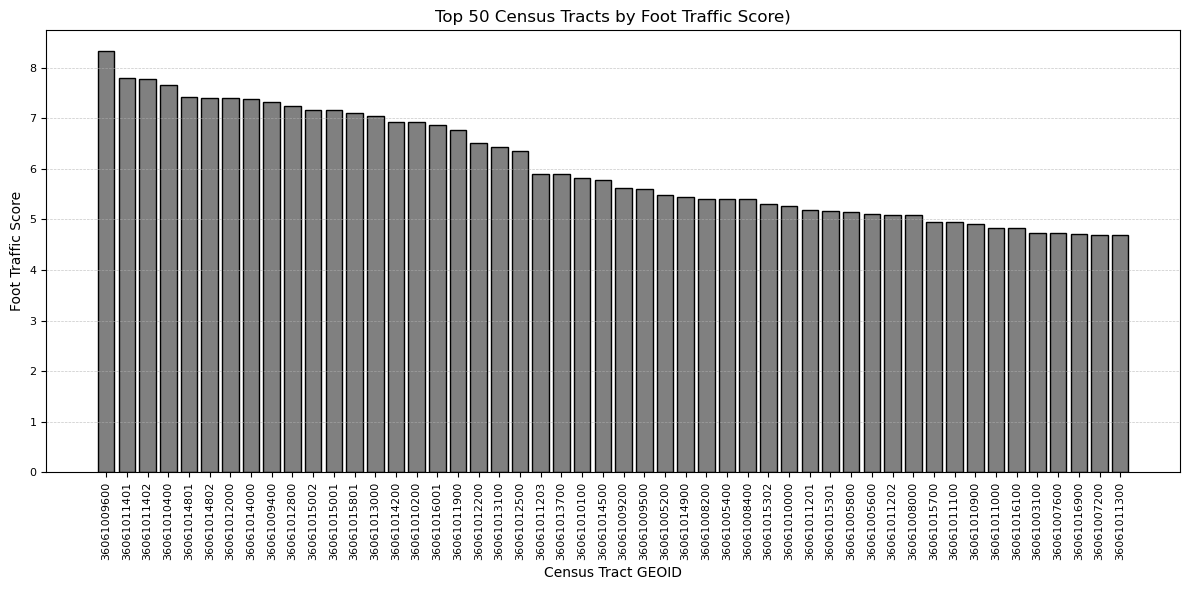

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined scores
combined_df = pd.read_csv("combined_scores.csv")

# Sort by combined score
top_tracts = combined_df.sort_values(by="combined_score", ascending=False).head(50)

# Plot
plt.figure(figsize=(12, 6))

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans'],
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

bars = plt.bar(
    top_tracts["GEOID"].astype(str),
    top_tracts["combined_score"],
    color="grey",
    edgecolor="black"
)

plt.xlabel("Census Tract GEOID")
plt.ylabel("Foot Traffic Score")
plt.title("Top 50 Census Tracts by Foot Traffic Score)")
#plt.gca().invert_yaxis()  # Highest score on top
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7,linewidth=0.5)
plt.tight_layout()

plt.show()